# k-Nearest Neighbors (kNN)

## Import required packages

In [1]:
%matplotlib inline

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

import matplotlib.pylab as plt

## Data Import

In [2]:
import pandas as pd
mower_df = pd.read_csv('RidingMowers.csv')
mower_df['Number'] = mower_df.index + 1

mower_df.shape
mower_df.head(9)

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5
5,110.1,19.2,Owner,6
6,108.0,17.6,Owner,7
7,82.8,22.4,Owner,8
8,69.0,20.0,Owner,9


In [3]:
from sklearn.model_selection import train_test_split as tts

train_Data, valid_Data = tts(mower_df, train_size=0.7, random_state=1)
print(train_Data.shape, valid_Data.shape)

newHousehold = pd.DataFrame([{'Income': 60, 'Lot_Size': 20}])
newHousehold

((16, 4), (8, 4))


C:\Users\sakar\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,Income,Lot_Size
0,60,20


## Scatter Plot

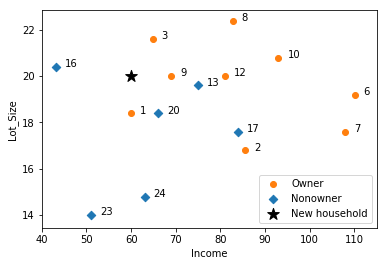

In [4]:
fig, ax = plt.subplots()


plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label


subset = train_Data.loc[train_Data['Ownership']=='Owner']
ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner', color='C1')

subset = train_Data.loc[train_Data['Ownership']=='Nonowner']
ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner', color='C0')

ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)


for _, row in train_Data.iterrows():
    ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

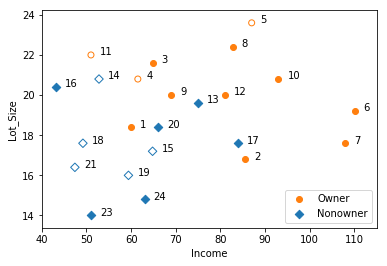

In [5]:
def plotDataset(ax, data, showLabel=True, **kwargs):
    
    plt.xlabel('Income')  # set x-axis label
    plt.ylabel('Lot_Size')  # set y-axis label
        
    subset = data.loc[data['Ownership']=='Owner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='o', label='Owner' if showLabel else None, color='C1', **kwargs)

    subset = data.loc[data['Ownership']=='Nonowner']
    ax.scatter(subset.Income, subset.Lot_Size, marker='D', label='Nonowner' if showLabel else None, color='C0', **kwargs)

    for _, row in data.iterrows():
        ax.annotate(row.Number, (row.Income + 2, row.Lot_Size))


fig, ax = plt.subplots()

plotDataset(ax, train_Data)
plotDataset(ax, valid_Data, showLabel=False, facecolors='none')

#ax.scatter(newHousehold.Income, newHousehold.Lot_Size, marker='*', label='New household', color='black', s=150)

plt.xlabel('Income')  # set x-axis label
plt.ylabel('Lot_Size')  # set y-axis label
    
handles, labels = ax.get_legend_handles_labels()
ax.set_xlim(40, 115)
ax.legend(handles, labels, loc=4)

plt.show()

## Selecting the Features & Target

In [6]:
# Getting the features and targets
# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('Ownership','Number')

features = [s for s in mower_df.columns if s not in excludeColumns]
#Alternatively use of an array of column namesfeatures=["Income", Lot_Size]
target = 'Ownership'


# partition data
train_x = train_Data[features]
train_y = train_Data[target]

# partition data
valid_x = valid_Data[features]
valid_y = valid_Data[target]

## Data Normalization
Initialize normalized training, validation, and complete data frames. Use the training data to learn the transformation.

In [7]:
scaler = preprocessing.StandardScaler()
scaler.fit(train_x)

train_X = scaler.fit_transform(train_x)

valid_X = scaler.transform(valid_x)

newHouseholdNorm = scaler.transform(newHousehold)


C:\Users\sakar\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


## Use k-nearest neighbour

In [8]:
#import required packages
from sklearn.neighbors import NearestNeighbors as knn
from math import sqrt

model = knn(n_neighbors = 3)
model.fit(train_X)

distances, indices = model.kneighbors(newHouseholdNorm)
print(train_X[indices[0], :])  # indices is a list of lists, we are only interested in the first element

model.fit(train_X, train_y)  #fit the model

[[-0.19804209  0.55743037]
 [-0.63409808 -0.17064195]
 [ 0.0926619   0.37541229]]


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=3, p=2, radius=1.0)

## Finding Optimal
Initialize a data frame with two columns: `k` and `accuracy`

In [9]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

from sklearn.neighbors import KNeighborsClassifier as knr
from sklearn import metrics

score_list = list()

for K in range(len(train_y)):
    
    K = K+1
    
    model = knr(n_neighbors = K)
    model = model.fit(train_X, train_y)  #fit the model
    
    pred_y = model.predict(train_X) #make prediction on test set
    score = metrics.accuracy_score(train_y, pred_y)
    
    print('Accuracy value for k= ' , K , 'is:', score)
    score_list.append((K, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
   

('Accuracy value for k= ', 1, 'is:', 1.0)
('Accuracy value for k= ', 2, 'is:', 0.75)
('Accuracy value for k= ', 3, 'is:', 0.9375)
('Accuracy value for k= ', 4, 'is:', 0.8125)
('Accuracy value for k= ', 5, 'is:', 0.75)
('Accuracy value for k= ', 6, 'is:', 0.875)
('Accuracy value for k= ', 7, 'is:', 0.6875)
('Accuracy value for k= ', 8, 'is:', 0.75)
('Accuracy value for k= ', 9, 'is:', 0.6875)
('Accuracy value for k= ', 10, 'is:', 0.8125)
('Accuracy value for k= ', 11, 'is:', 0.75)
('Accuracy value for k= ', 12, 'is:', 0.75)
('Accuracy value for k= ', 13, 'is:', 0.6875)
('Accuracy value for k= ', 14, 'is:', 0.75)
('Accuracy value for k= ', 15, 'is:', 0.5625)
('Accuracy value for k= ', 16, 'is:', 0.5625)


In [10]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

from sklearn.neighbors import KNeighborsClassifier as knr
from sklearn import metrics

score_list = list()

for K in range(len(train_y)):
    
    K = K+1
    
    model = knr(n_neighbors = K)
    model = model.fit(train_X, train_y)  #fit the model
    
    pred_y = model.predict(valid_X) #make prediction on test set
    score = metrics.accuracy_score(valid_y, pred_y)
    
    print('Accuracy value for k= ' , K , 'is:', score)
    score_list.append((K, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
   

('Accuracy value for k= ', 1, 'is:', 0.875)
('Accuracy value for k= ', 2, 'is:', 0.875)
('Accuracy value for k= ', 3, 'is:', 0.875)
('Accuracy value for k= ', 4, 'is:', 0.75)
('Accuracy value for k= ', 5, 'is:', 0.875)
('Accuracy value for k= ', 6, 'is:', 1.0)
('Accuracy value for k= ', 7, 'is:', 1.0)
('Accuracy value for k= ', 8, 'is:', 1.0)
('Accuracy value for k= ', 9, 'is:', 0.875)
('Accuracy value for k= ', 10, 'is:', 0.875)
('Accuracy value for k= ', 11, 'is:', 0.875)
('Accuracy value for k= ', 12, 'is:', 0.875)
('Accuracy value for k= ', 13, 'is:', 0.875)
('Accuracy value for k= ', 14, 'is:', 0.875)
('Accuracy value for k= ', 15, 'is:', 0.375)
('Accuracy value for k= ', 16, 'is:', 0.375)


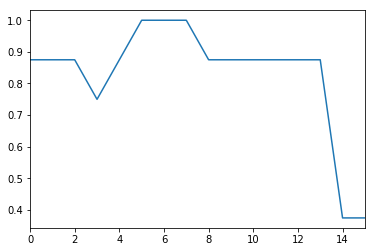

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

score_df['accuracy'].plot()


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

number_of_neighbors = range(1,12)
params = {'n_neighbors':number_of_neighbors}

knr = KNeighborsClassifier()

model = GridSearchCV(knr, params, cv=5)
model.fit(train_X, train_y)

print(model.best_params_)

{'n_neighbors': 1}


C:\Users\sakar\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
